# Cold gas phase

In [1]:
import os
from PIL import Image as Im
%pylab
%matplotlib inline
%run ./load_notebook.py

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


Запишем формулы (20) и (26), которыми мы будем пользоваться [из статьи](https://arxiv.org/pdf/0810.2556.pdf)

$$ \Sigma_{SO_4} = \dfrac{6.1}{M_{\odot} pc^{-2}} f_g^{0.3}\left(\dfrac{Z}{0.1 Z_{\odot}}\right)^{-0.3} \left(\dfrac{I}{10^6 cm^{-2}s^{-1}}\right)^{0.23} $$

$$f_g = \dfrac{\Sigma_{gas}}{\Sigma_{gas}+\Sigma_{star}}$$

$$I = 10^6 cm^{-2}s^{-1}\left(\dfrac{\Sigma_{SFR}}{5\cdot 10^4 M_{\odot} yr^{-1} pc^{-2}}\right) $$

Если $\Sigma_{gas} > \Sigma_{SO_4}$, то облать гравитационно нестабильна

In [2]:
Sigma_s = np.load('./data/Sigma_s.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
Sigma_H2 = np.load('./data/Sigma_H2.npy')
Sigma_SFR = np.load('./data/Sigma_SFR.npy')
dist_kpc = np.load('./data/dist_kpc.npy')

In [18]:
I = np.zeros(dist_kpc.shape)
I = Sigma_SFR * 5. * 10**10
Z_sun = 0.012
z = 8.55

как перевести в нормальную металличность:https://www.tng-project.org/data/forum/topic/196/converting-given-metallicities-to-logoh12/

In [19]:
def conv(log12):
    return np.power(10, log12-12,dtype = np.float) * 26.25 #0.74/0.35 * 16

In [20]:
Z = conv(z)
print(Z)
cold_phase_const = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36 * (Sigma_HI[i][j]+Sigma_H2[i][j])
        f = Sigma_gas / (Sigma_gas + Sigma_s[i][j])
        Sigma_SO = 6.1 * np.power(f, 0.3,dtype = np.float)  * np.power(I[i][j], 0.23,dtype = np.float)
        cold_phase_const[i][j] = Sigma_SO / Sigma_gas  * np.power(Z/Z_sun/0.1, -0.3,dtype = np.float) 
np.save('./data/cold_phase_const.npy',cold_phase_const)        

0.009313851467381371


/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


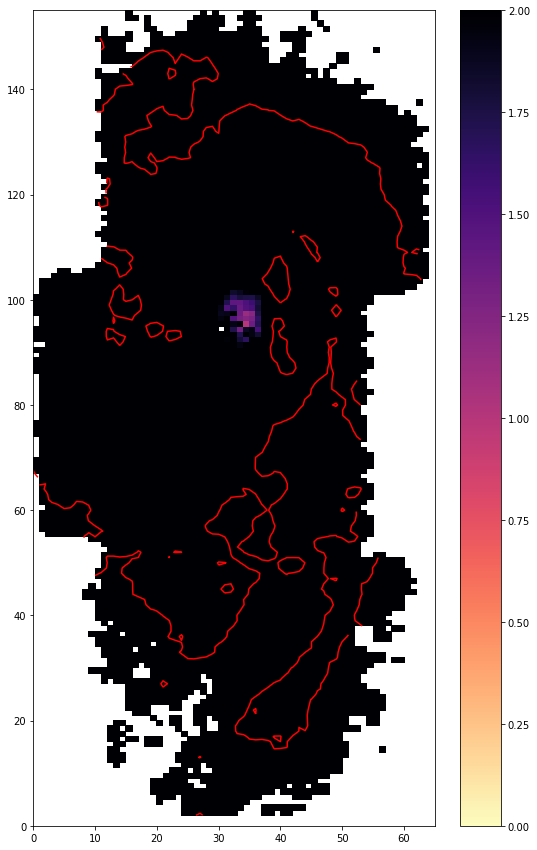

In [39]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.032,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, cold_phase_const, cmap='magma_r')
quadmesh.set_clim(vmin=0., vmax = 2.)
plt.colorbar()

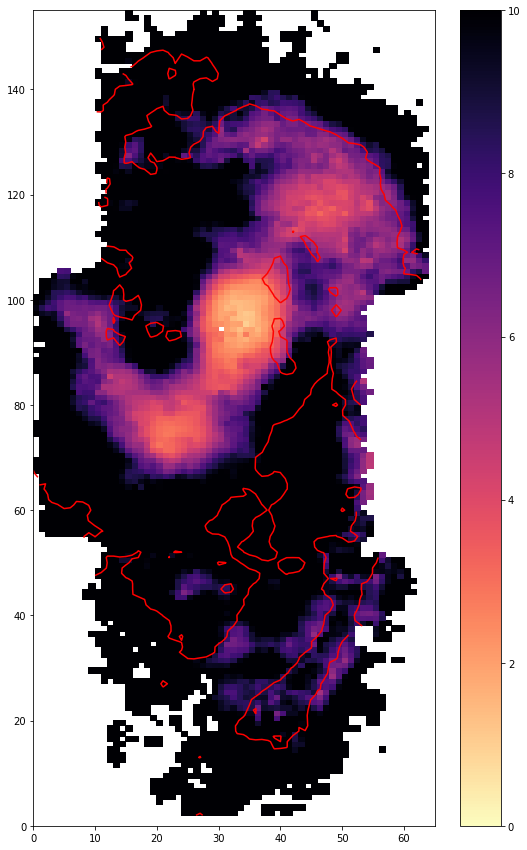

In [21]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.032,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, cold_phase_const, cmap='magma_r')
quadmesh.set_clim(vmin=0., vmax = 10)
plt.colorbar()

In [32]:
Inst_field = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if(0. < cold_phase_const[i][j] <= 9.):
            Inst_field[i][j] = 1
        else: 
            Inst_field[i][j] = 0   

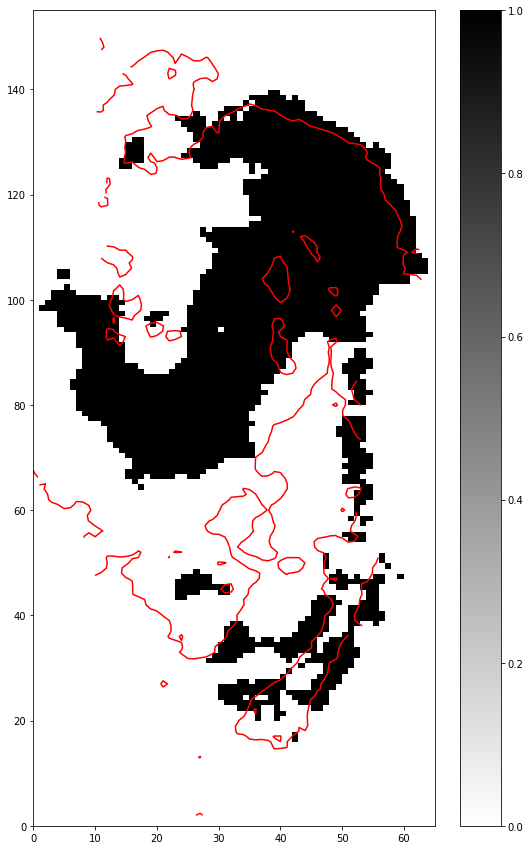

In [33]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.032,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field, cmap='gist_yarg')
plt.colorbar()

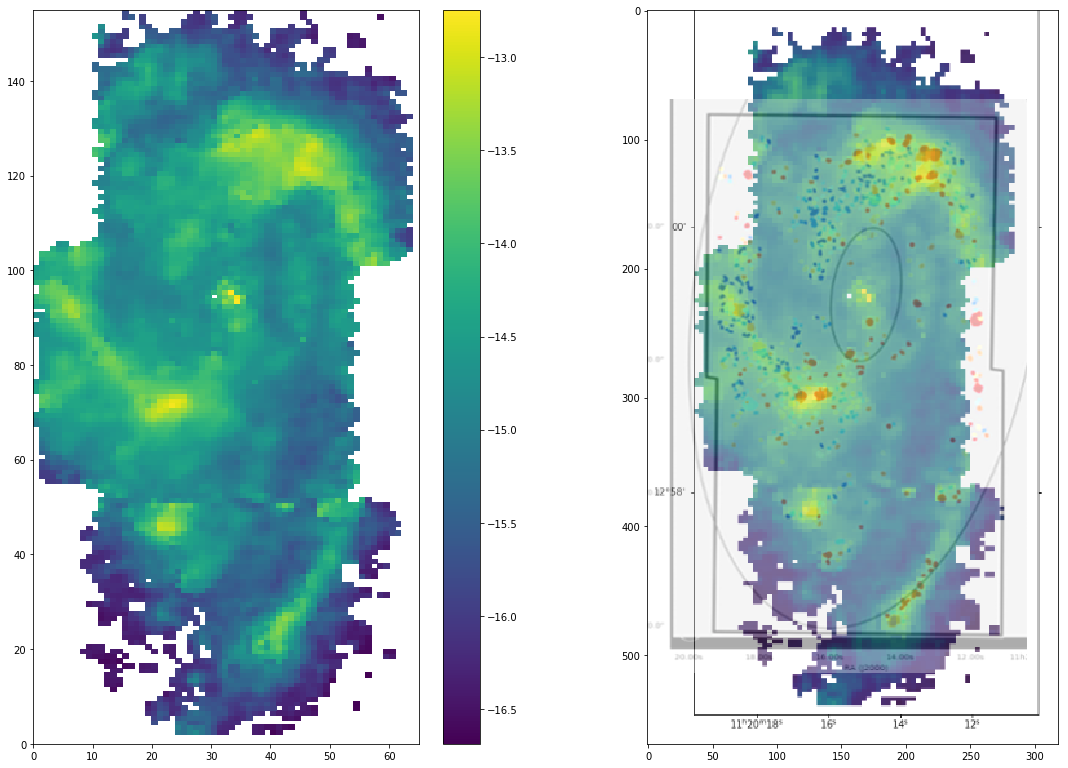

In [41]:
H_alpha = np.load('./data/H_alpha.npy')
plt.figure(figsize=[19, 13.5])
plt.subplot(1,2,1)
quadmesh = plt.pcolormesh(X, Y, np.log10(H_alpha))
#quadmesh.set_clim(vmax = -14.3)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(Im.open('./images/metal4.png'))
plt.show()

In [42]:
 Z = np.zeros(dist_kpc.shape)
for i, row in enumerate(H_alpha):
    for j, col in enumerate(H_alpha[0]):
        if (np.log10(H_alpha[i][j])<-14.47):
            Z[i][j] = 0.2
        if (-14.47 <= np.log10(H_alpha[i][j]) < -14.):
            Z[i][j] = 8.5    
        if (-14.<= np.log10(H_alpha[i][j]) < -13.7):
            Z[i][j] = 8.52
        if (-13.7 <= np.log10(H_alpha[i][j]) <-13.5):
            Z[i][j] = 8.55    
        if (-13.5 <= np.log10(H_alpha[i][j]) < -13.15):
            Z[i][j] = 8.58
        if (-13.15 <= np.log10(H_alpha[i][j])):
            Z[i][j] = 8.6 
                
Z[90:100,27:38] = 0.2  
Z[48:54,17:26] = 0.2 
Z[35:44,45:55] = 0.2 
Z[70:77, 0:7] = 0.2

for i, row in enumerate(H_alpha):
    for j, col in enumerate(H_alpha[0]):
        if (Z[i][j]==0):
            Z[i][j] = NAN

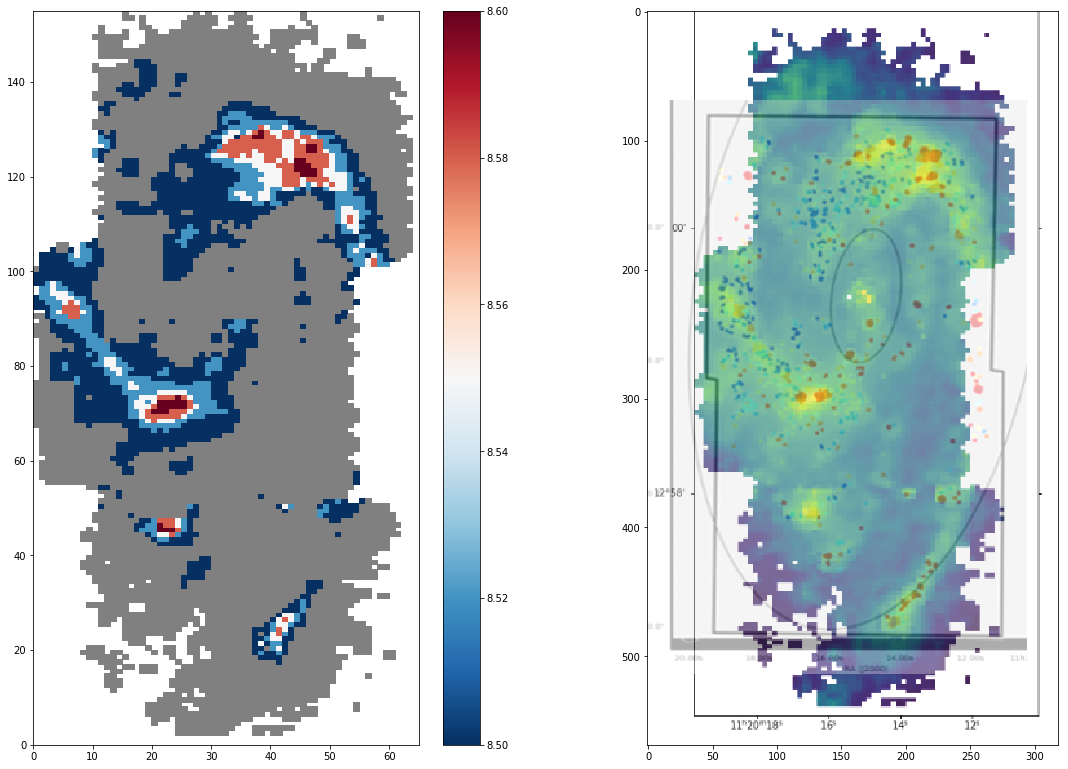

In [43]:
plt.figure(figsize=[19, 13.5])
plt.subplot(1,2,1)
quadmesh = plt.pcolormesh(X, Y, Z,cmap='RdBu_r')
quadmesh.set_clim(vmin=8.5,vmax = 8.6)
quadmesh.cmap.set_under('grey')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(Im.open('./images/metal4.png'))
plt.show()

In [44]:

cold_phase = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36 * (Sigma_HI[i][j]+Sigma_H2[i][j])
        f = Sigma_gas / (Sigma_gas + Sigma_s[i][j])
        Sigma_SO = 6.1 * np.power(f, 0.3,dtype = np.float)  * np.power(I[i][j], 0.23,dtype = np.float)
        cold_phase[i][j] = Sigma_SO / Sigma_gas  * np.power(conv(Z[i][j])/Z_sun/0.1, -0.3,dtype = np.float)   

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys


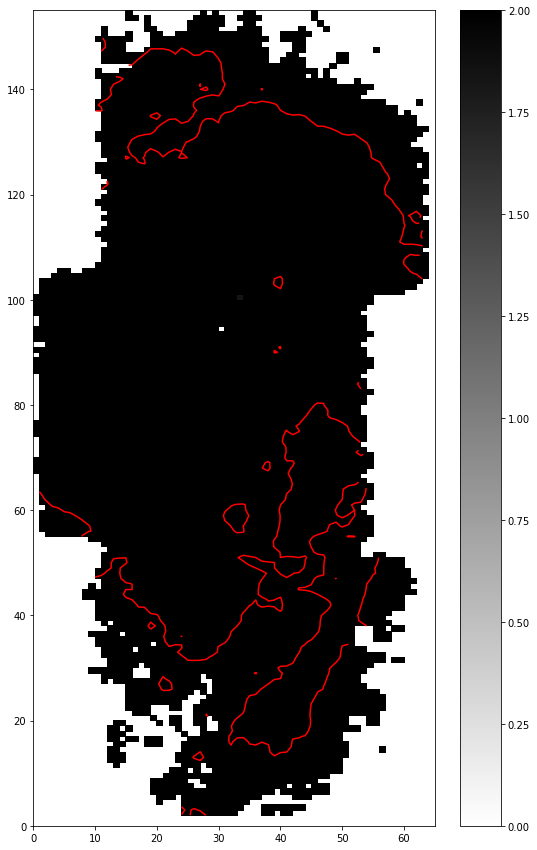

In [45]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.021,], aspect='auto', alpha=1, colors='red')
#CS = plt.contour(X, Y, Z, levels=[0,1], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, cold_phase, cmap='gist_yarg')
quadmesh.set_clim(vmin=0., vmax = 2.)
plt.colorbar()

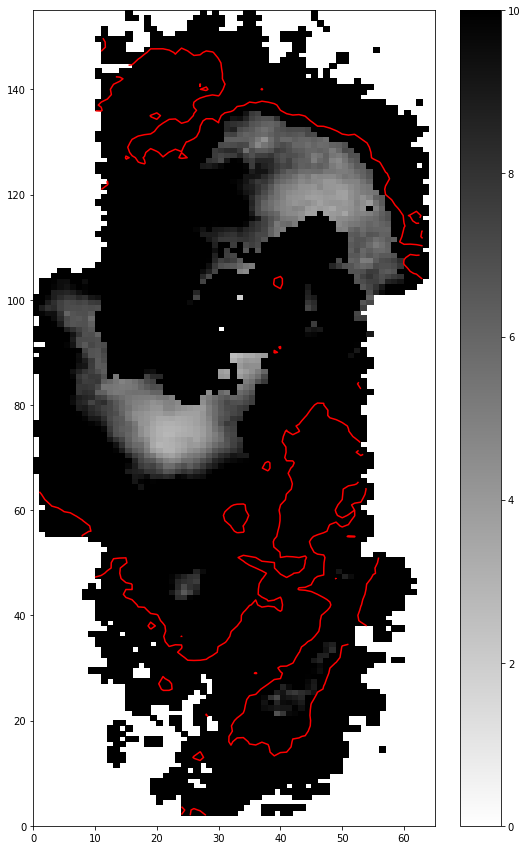

In [47]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.021,], aspect='auto', alpha=1, colors='red')
#CS = plt.contour(X, Y, Z, levels=[0,1], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, cold_phase, cmap='gist_yarg')
quadmesh.set_clim(vmin=0., vmax = 10)
plt.colorbar()

In [13]:
Inst_field = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if(0. < cold_phase[i][j] <= 1.):
            Inst_field[i][j] = 1
        if(cold_phase[i][j] > 1.): 
            Inst_field[i][j] = 0
        if(Z[i][j] == NAN):
            Inst_field[i][j] = NAN

#### Красной линией обмечены области, в которых у нас есть данные по металличности

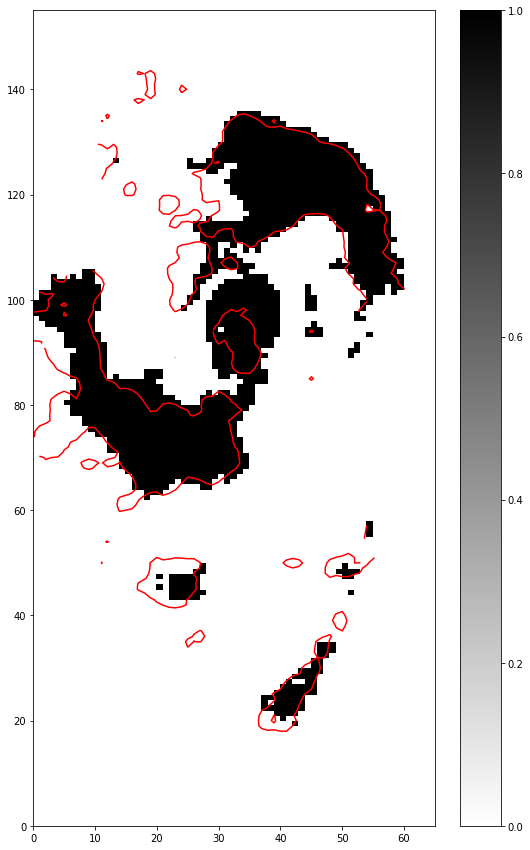

In [14]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.032,], aspect='auto', alpha=1, colors='red')
#CS = plt.contour(X, Y, Z, levels=[8.4,], aspect='auto', alpha=1, colors='red') 
quadmesh = plt.pcolormesh(X, Y, Inst_field, cmap='gist_yarg')
plt.colorbar()

In [15]:
np.save('./data/cold_phase.npy', cold_phase)

In [16]:
for i, row in enumerate(H_alpha):
    for j, col in enumerate(H_alpha[0]):
        if (Z[i][j]==0.2):
            Z[i][j] = NAN

f = np.zeros(dist_kpc.shape)            
cold_phase_ = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36 * (Sigma_HI[i][j]+Sigma_H2[i][j])
        f[i][j] = Sigma_gas / (Sigma_gas + Sigma_s[i][j])
        Sigma_SO = 6.1 * np.power(f[i][j], 0.3,dtype = np.float)  * np.power(I[i][j], 0.23,dtype = np.float)
        cold_phase_[i][j] = Sigma_SO / Sigma_gas  * np.power(Z[i][j]/Z_sun/0.1, -0.3,dtype = np.float)   

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in power
  if sys.path[0] == '':


Text(0.5, 1.0, 'cold_phase(Z = const = 8.5)')

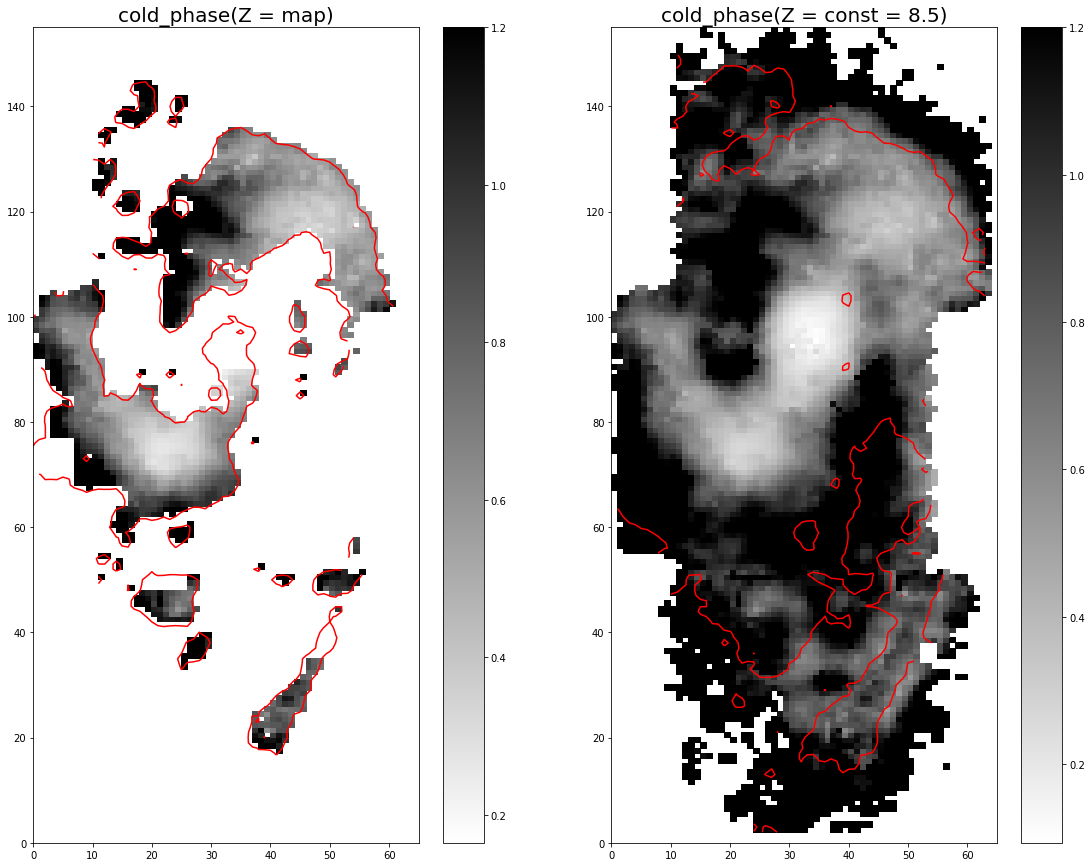

In [17]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[19,15])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.021,], aspect='auto', alpha=1, colors='red')
#CS = plt.contour(X, Y, Z, levels=[0,1], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, cold_phase_, cmap='gist_yarg')
quadmesh.set_clim( vmax = 1.2)
plt.colorbar()
plt.title('cold_phase(Z = map)', fontsize = 20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.005,], aspect='auto', alpha=1, colors='red')
#CS = plt.contour(X, Y, Z, levels=[0,1], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, cold_phase_const, cmap='gist_yarg')
quadmesh.set_clim( vmax = 1.2)
plt.colorbar()
plt.title('cold_phase(Z = const = 8.5)', fontsize = 20)

Text(0.5, 1.0, 'cold_phase(Z = const = 8.5)')

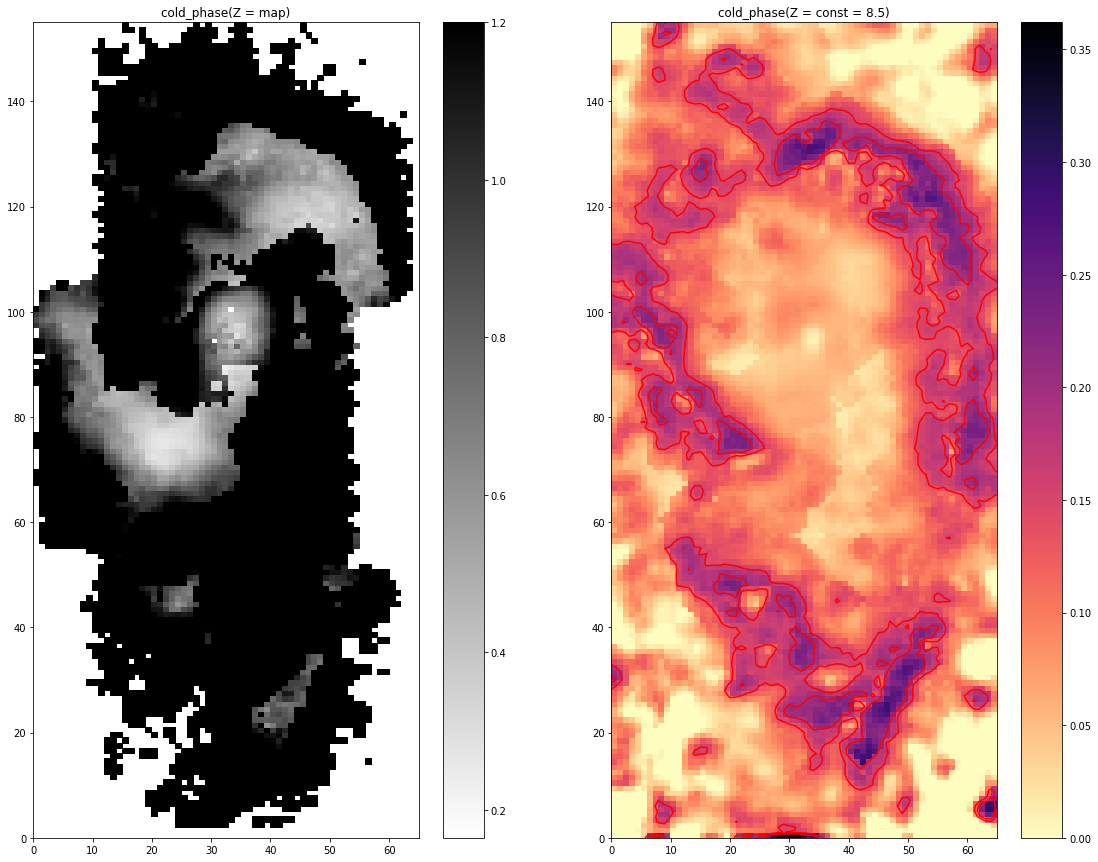

In [119]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[19,15])
plt.subplot(1,2,1)
#CS = plt.contour(X, Y, f, levels=[0.,0.15], aspect='auto', alpha=1, colors='red')
#CS = plt.contour(X, Y, Z, levels=[0,1], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, cold_phase, cmap='gist_yarg')
quadmesh.set_clim( vmax = 1.2)
plt.colorbar()
plt.title('cold_phase(Z = map)')

plt.subplot(1,2,2)
CS = plt.contour(X, Y, f, levels=[0.15,0.2], aspect='auto', alpha=1, colors='red')
#CS = plt.contour(X, Y, Z, levels=[0,1], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, f, cmap='magma_r')
quadmesh.set_clim( vmin = 0)
plt.colorbar()
plt.title('cold_phase(Z = const = 8.5)')